### Kaggle competiton

## House Prices: Advanced Regression Techniques

Predict sales prices and practice feature engineering, RFs, and gradient boosting

In [1]:
import pandas as pd
import numpy as np

In [2]:
from scipy.stats import norm
from scipy import stats

In [3]:
df0 = pd.read_csv('data/train.csv')

In [4]:
print df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
df0.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df0.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [8]:
df0['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
import seaborn as sns

* SalePrice 에 대해서만 조금 더 알아보기

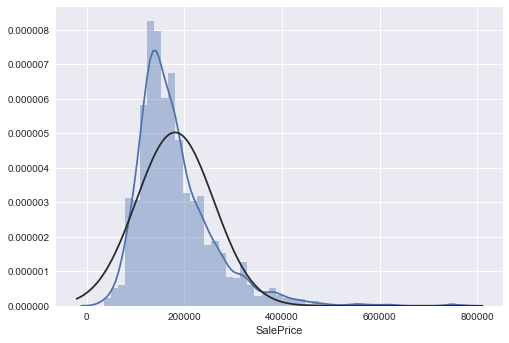

In [11]:
sns.distplot(df0['SalePrice'] ,fit=norm)
plt.show()

In [12]:
print ("mean: %f") %df0['SalePrice'].mean()
print ("std: %f") %df0['SalePrice'].std()
print ("median: %f") %df0['SalePrice'].median()
print ("skew: %f") %df0['SalePrice'].skew()
print ("kurtosis: %f") %df0['SalePrice'].kurt()

mean: 180921.195890
std: 79442.502883
median: 163000.000000
skew: 1.882876
kurtosis: 6.536282


* skewnes > 0 : 오른쪽 꼬리를 가지고, 왼쪽에 더 많은 데이터가 분포한다.
* kurtosis 가 6보다 크다: 확률 분포가 매우 뾰족하다. 중심 부위에 많은 데이터가 몰려 있다.

* feature 중에서 숫자로만 구성된 feature들만 따로 먼저 확인 

In [13]:
numeric_col = df0._get_numeric_data().columns

In [14]:
numeric_col

Index([u'Id', u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold', u'SalePrice'],
      dtype='object')

In [15]:
numeric_col = numeric_col.drop('SalePrice')

In [16]:
c_cols = df0.columns.drop(numeric_col).drop('SalePrice')

In [17]:
c_cols

Index([u'MSZoning', u'Street', u'Alley', u'LotShape', u'LandContour',
       u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood',
       u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2', u'Heating',
       u'HeatingQC', u'CentralAir', u'Electrical', u'KitchenQual',
       u'Functional', u'FireplaceQu', u'GarageType', u'GarageFinish',
       u'GarageQual', u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence',
       u'MiscFeature', u'SaleType', u'SaleCondition'],
      dtype='object')

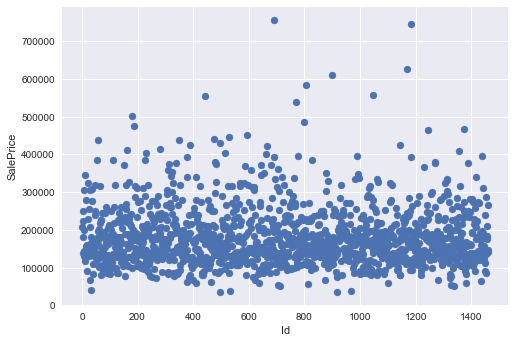

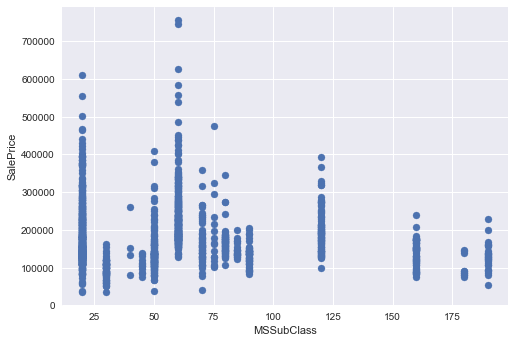

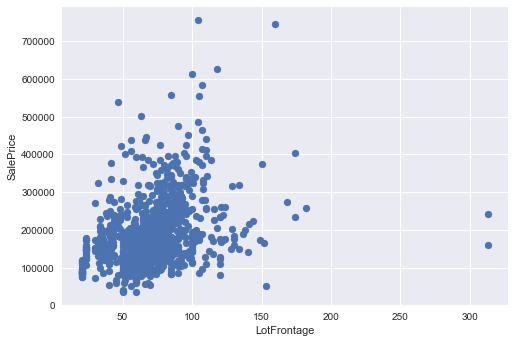

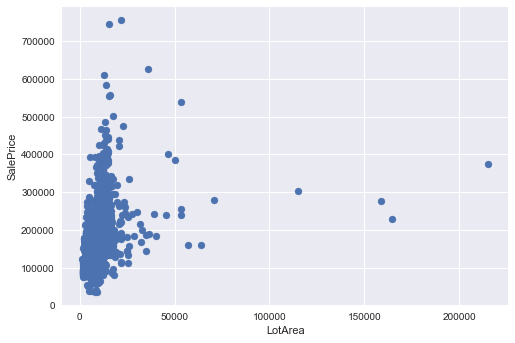

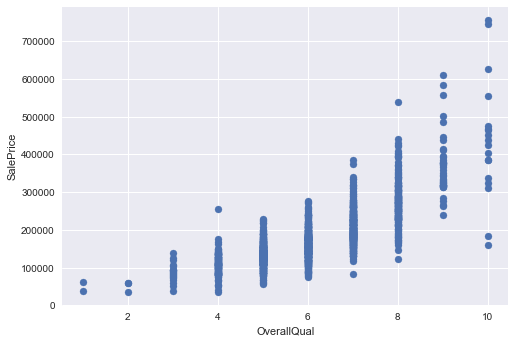

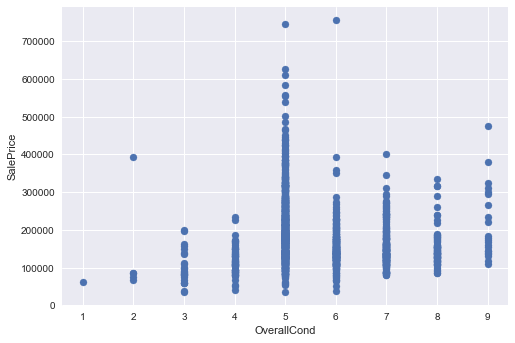

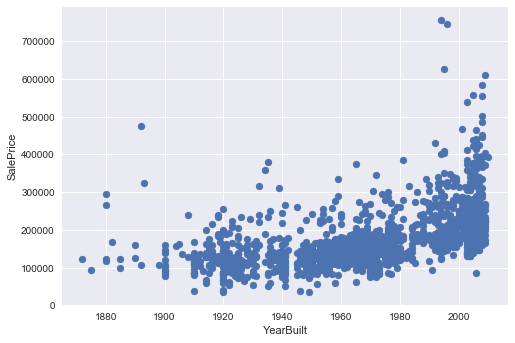

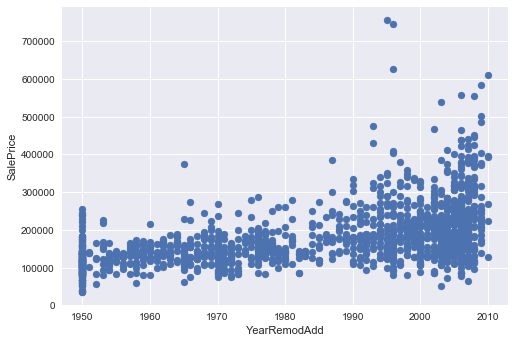

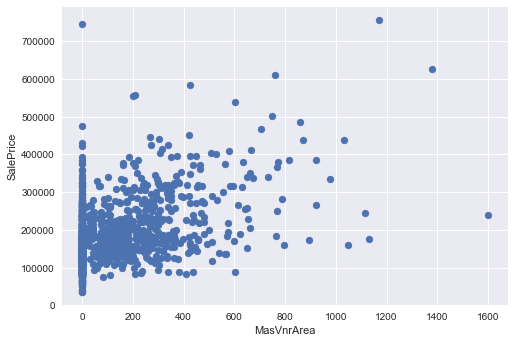

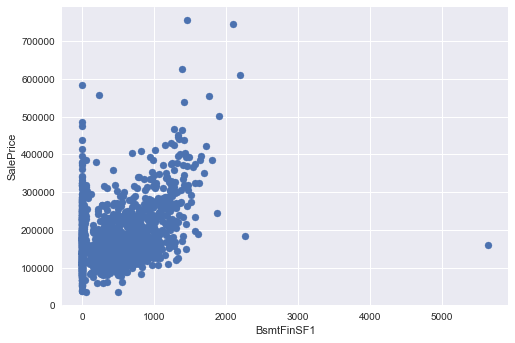

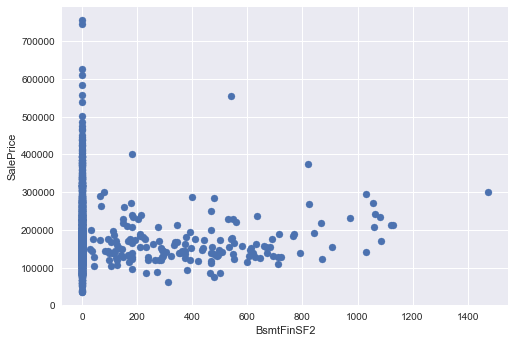

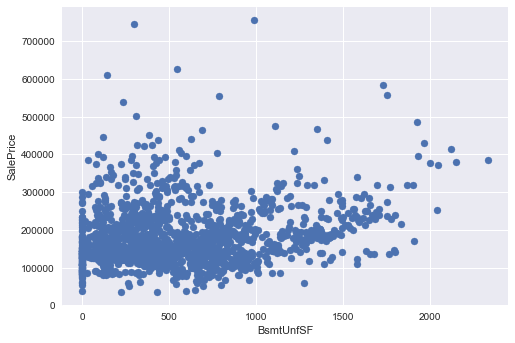

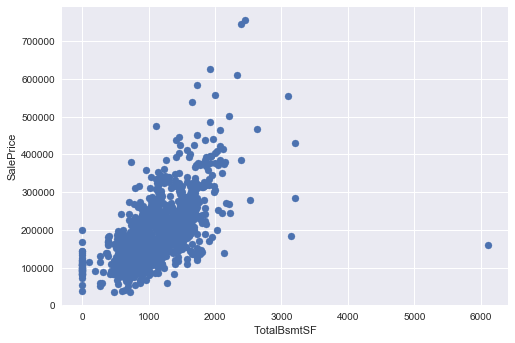

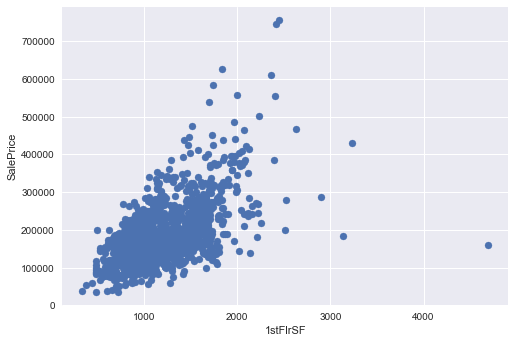

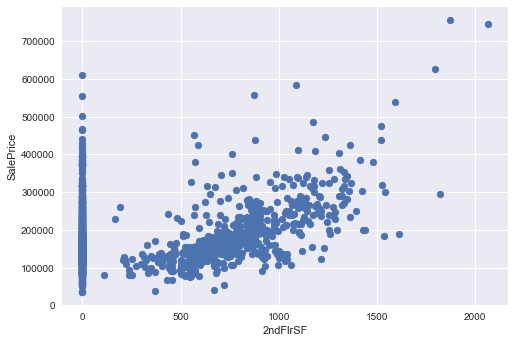

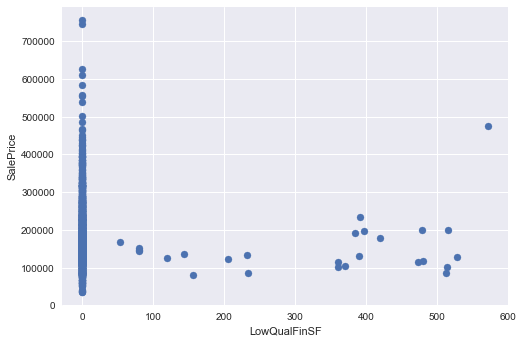

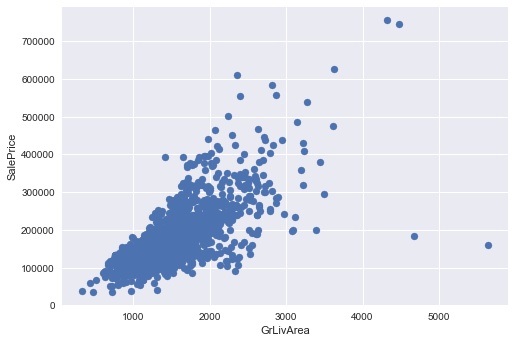

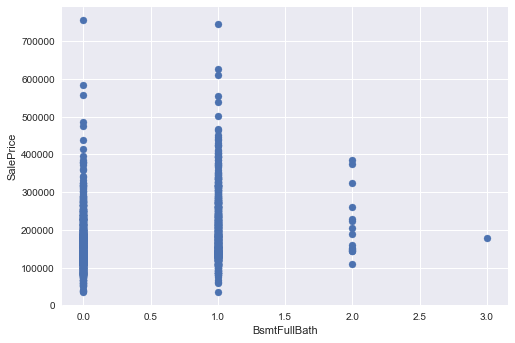

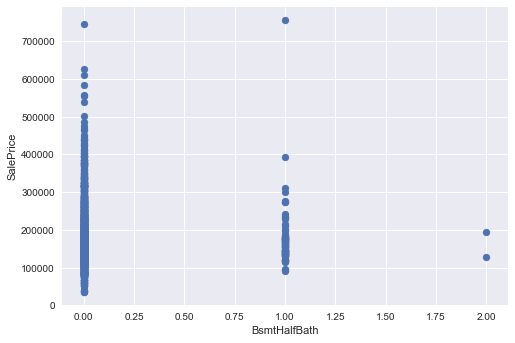

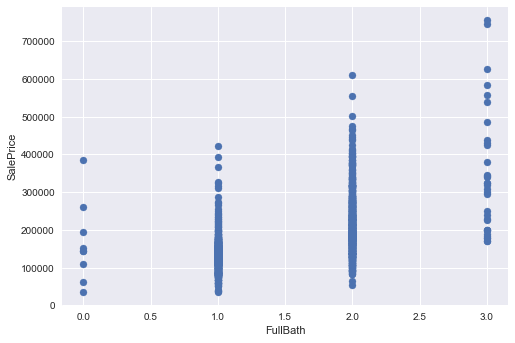

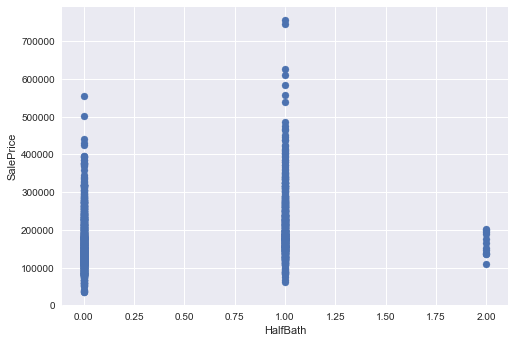

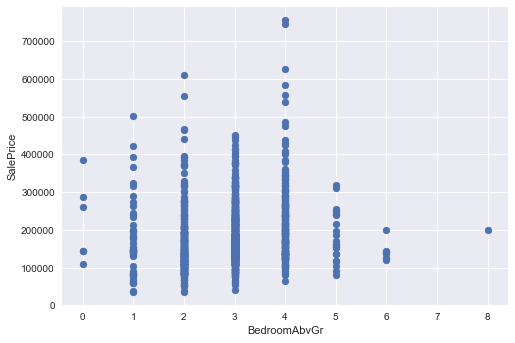

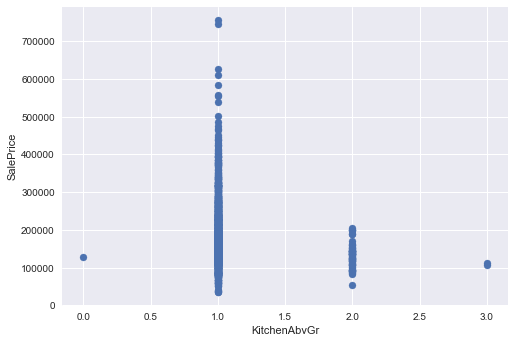

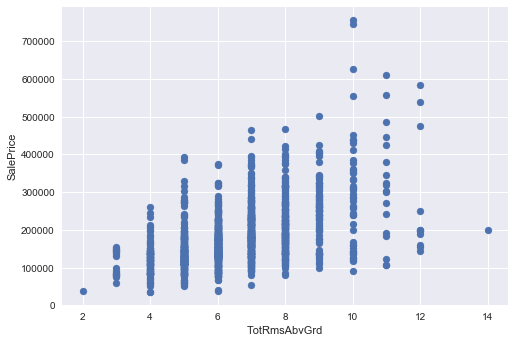

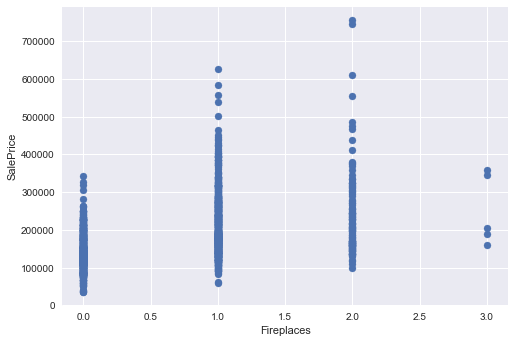

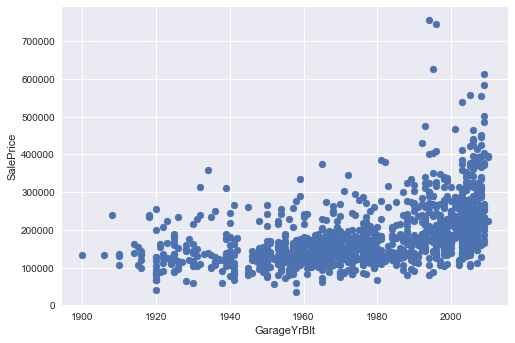

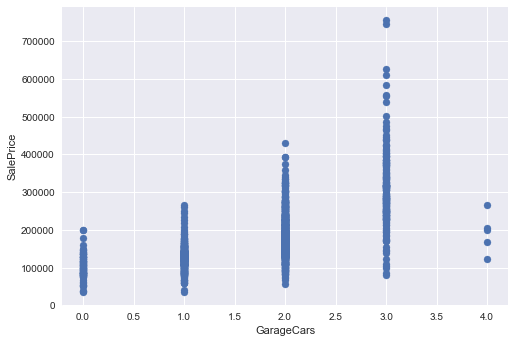

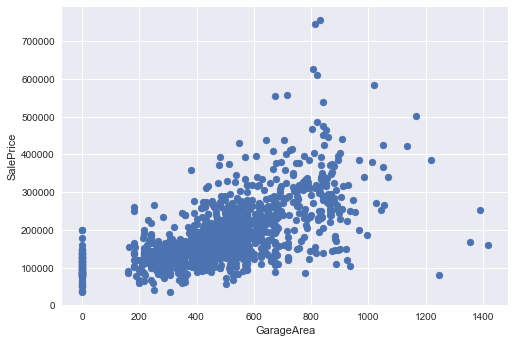

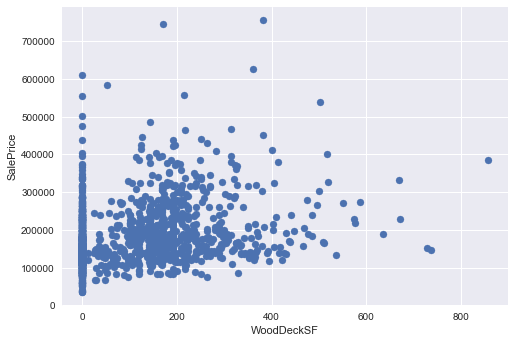

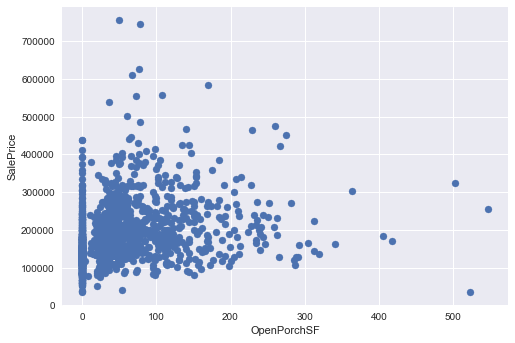

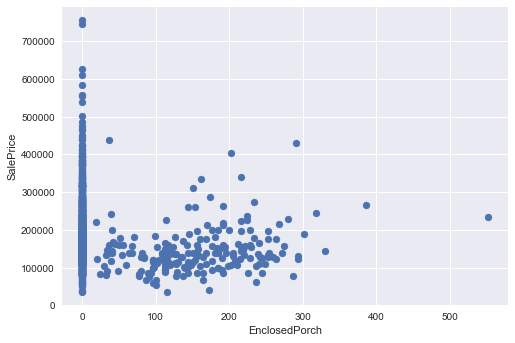

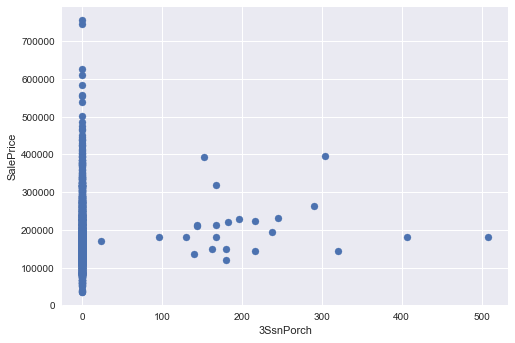

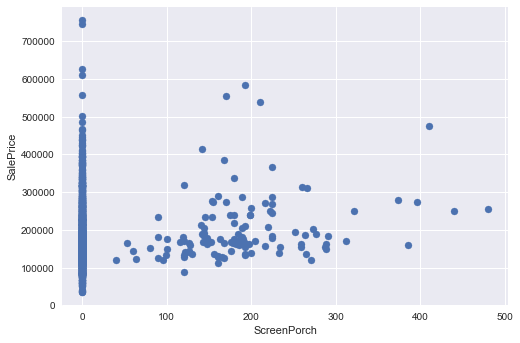

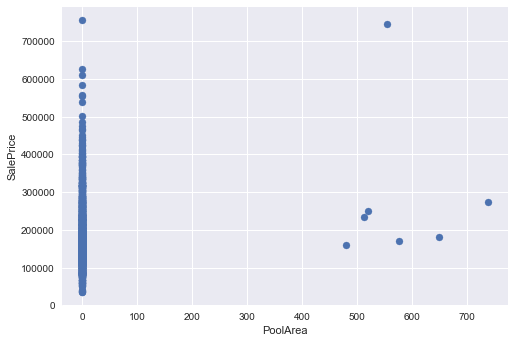

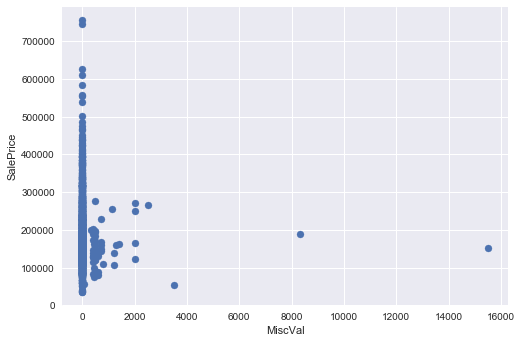

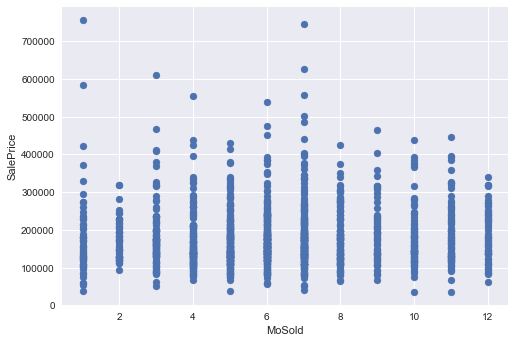

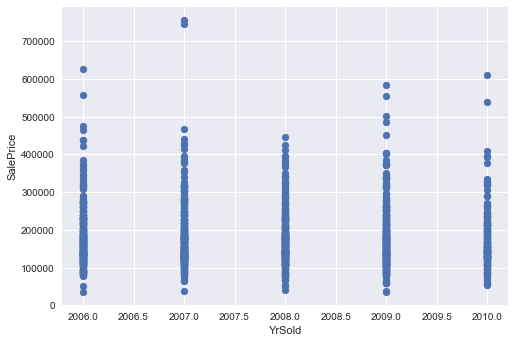

In [18]:
## 숫자 데이터들의 피쳐별로 scatter를 그려보자. 
target = 'SalePrice'
y = df0[target].values
for x in numeric_col:
    X = df0[x].values
    plt.scatter(X,y)
    plt.xlabel(x)
    plt.ylabel(target)
    
    plt.show()

* 위의 산포도에서 SalePrice들과 영향이 있어 보이는 feature를 골라서 다시 한번 확인

In [19]:
n_col2 = ['GrLivArea','TotalBsmtSF', '1stFlrSF','2ndFlrSF','SalePrice' ]

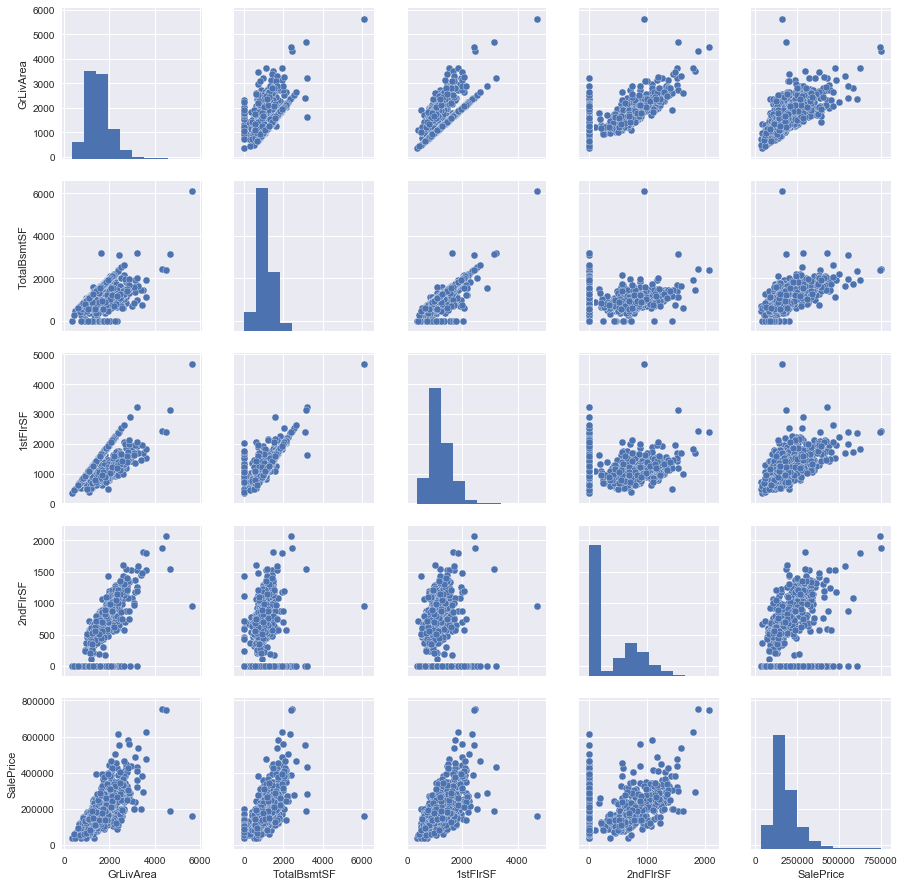

In [20]:
sns.pairplot(df0[n_col2])
plt.show()

* 카테고리 타입의 feature를 하나 확인해보자 

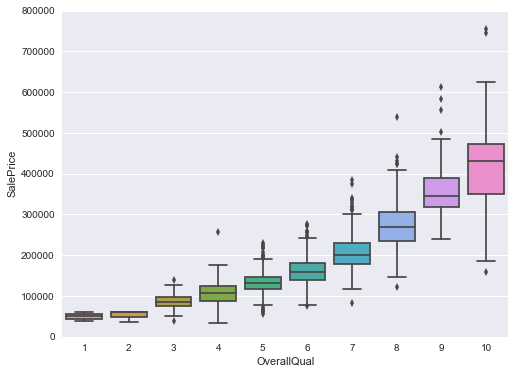

In [21]:
var = 'OverallQual'
data = pd.concat([df0['SalePrice'], df0[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

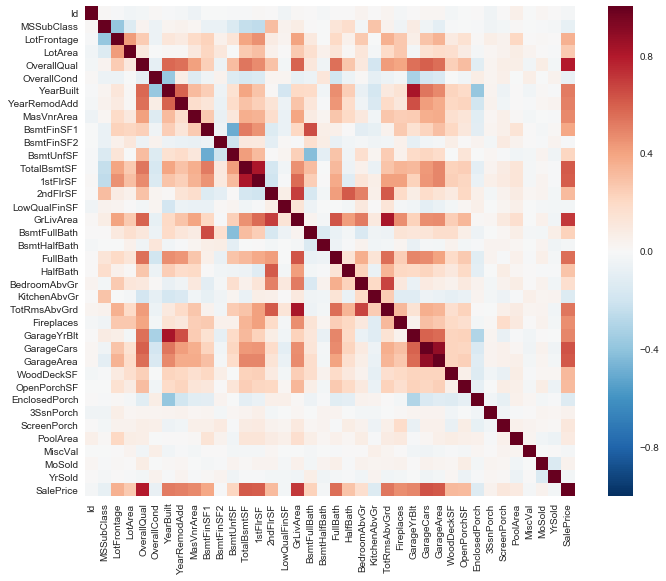

In [22]:
#correlation matrix
corrmat = df0.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

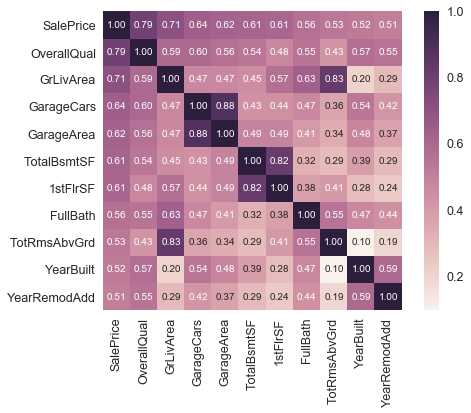

In [23]:
k = 11
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df0[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot =True, square=True, fmt='.2f', annot_kws = {'size':10}, yticklabels= cols.values, xticklabels= cols.values)

plt.show()

In [24]:
cols

Index([u'SalePrice', u'OverallQual', u'GrLivArea', u'GarageCars',
       u'GarageArea', u'TotalBsmtSF', u'1stFlrSF', u'FullBath',
       u'TotRmsAbvGrd', u'YearBuilt', u'YearRemodAdd'],
      dtype='object')

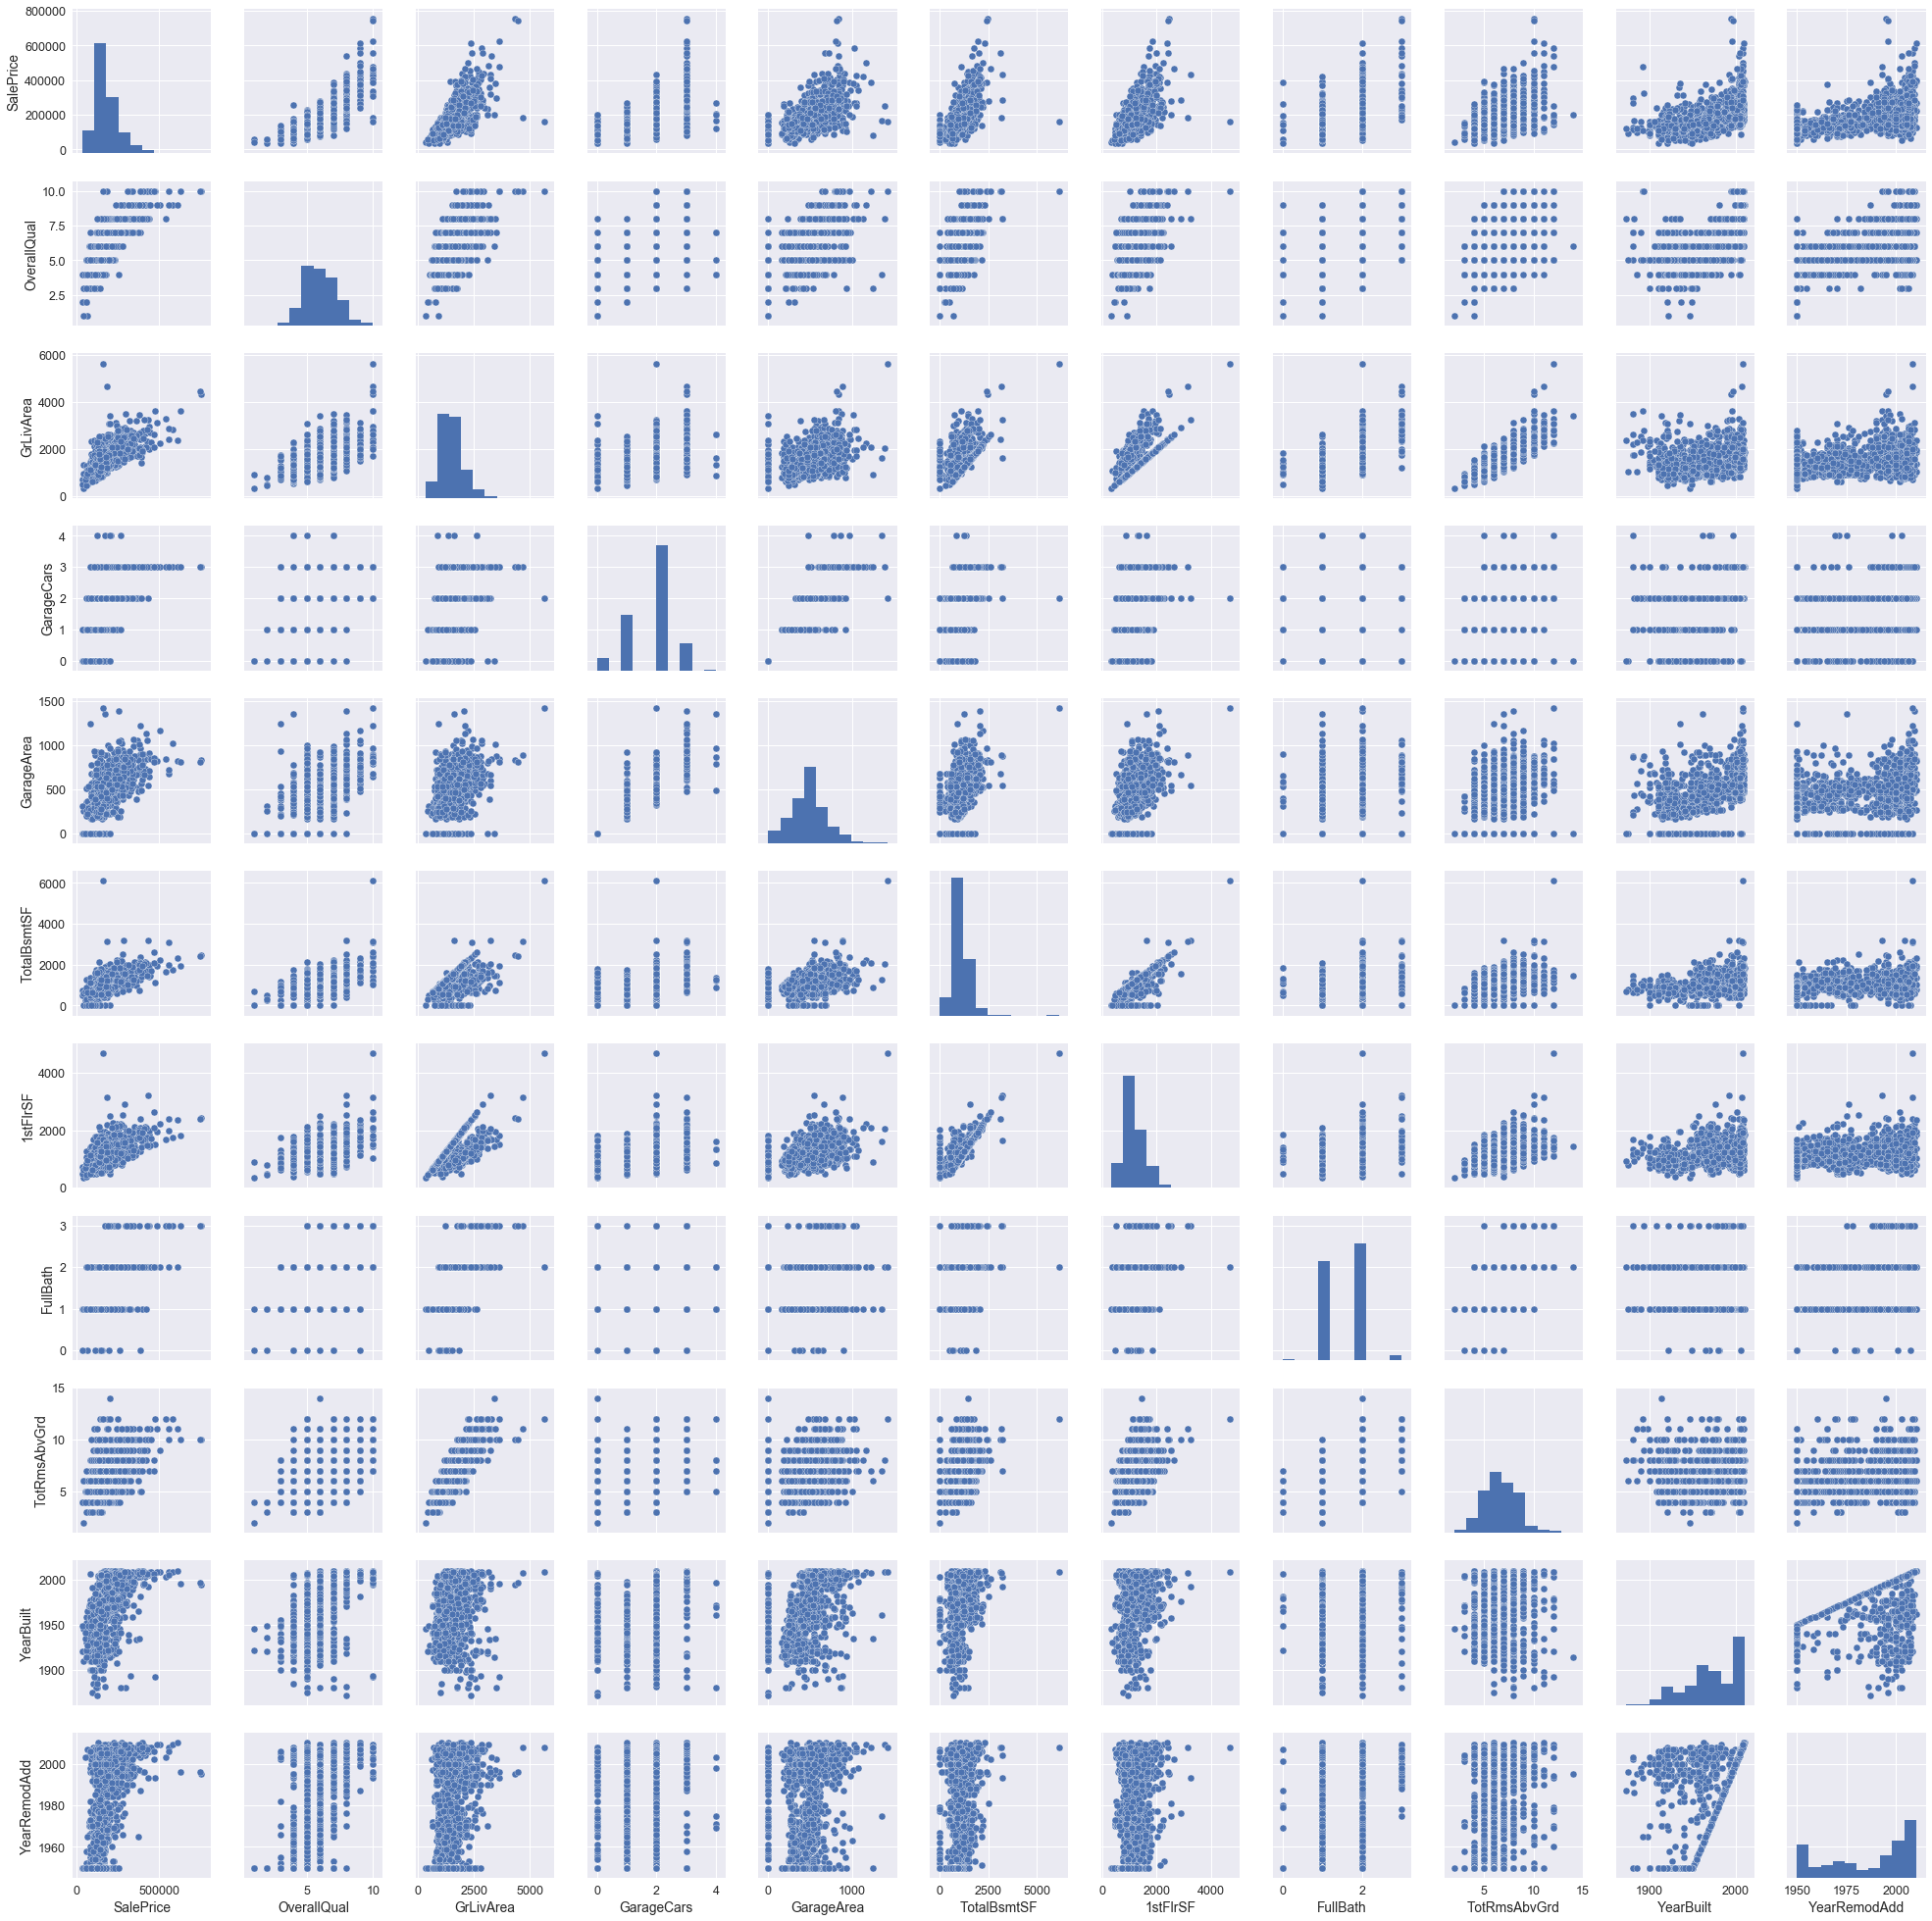

In [25]:
sns.pairplot(df0[cols])
plt.show()

missing data 처리

In [26]:
# 0 값들 찾기
total = df0.isnull().sum().sort_values(ascending = False)
percent = (df0.isnull().sum()/df0.isnull().count()).sort_values(ascending = False)
m_data = pd.concat([total,percent], axis = 1, keys =['Total', 'Percent'])
m_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [27]:
# null 데이터 값이 1% 이상인 column은 삭제하고, 
# 데이터 1개만 null인 u'Electrical은 row를 삭제한다. 
df1 = df0.copy()
df1 = df1.drop((m_data[m_data['Total']>1]).index,1)
df1 = df1.drop(df0.loc[df0['Electrical'].isnull()].index)
df1.isnull().sum().max()

0

In [28]:
# electrical 이 없는 것 지워서 1460 -- > 1459
len(df1)

1459

In [29]:
# null 1% 이상인 컬럼은 삭제해서 81---> 63개가됨
len(df1.columns)

63

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df1['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


C:\Users\UY Kim\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [32]:
cols

Index([u'SalePrice', u'OverallQual', u'GrLivArea', u'GarageCars',
       u'GarageArea', u'TotalBsmtSF', u'1stFlrSF', u'FullBath',
       u'TotRmsAbvGrd', u'YearBuilt', u'YearRemodAdd'],
      dtype='object')

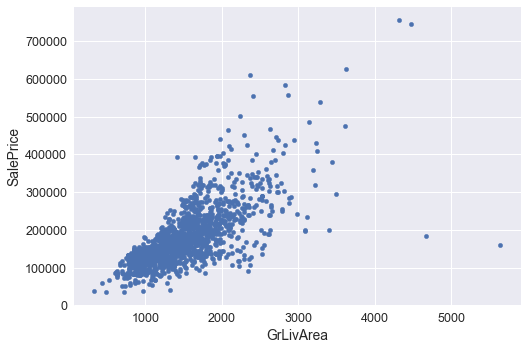

In [33]:
var = 'GrLivArea'
data = pd.concat([df1['SalePrice'], df1[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice')
plt.show()

In [34]:
#deleting points
df1.sort_values(by = 'GrLivArea', ascending = False)[:2]


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [35]:
df1= df1.drop(df1[df1['Id'] == 1299].index)
df1 = df1.drop(df1[df1['Id'] == 524].index)

가장 바깥에 있던 2개를 삭제하고 다시 다른 피쳐에 대해서 그래프 그려보면 
해당 피쳐의 outlier 도 삭제되어 있는 것을 확인할 수 있다. 

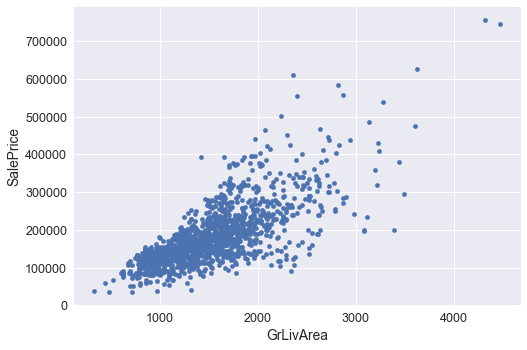

In [36]:
var = 'GrLivArea'
data = pd.concat([df1['SalePrice'], df1[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice')
plt.show()

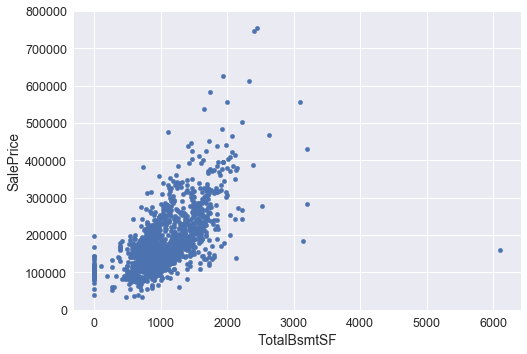

In [39]:
var = 'TotalBsmtSF'
data = pd.concat([df0['SalePrice'], df0[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice',ylim=(0,800000));


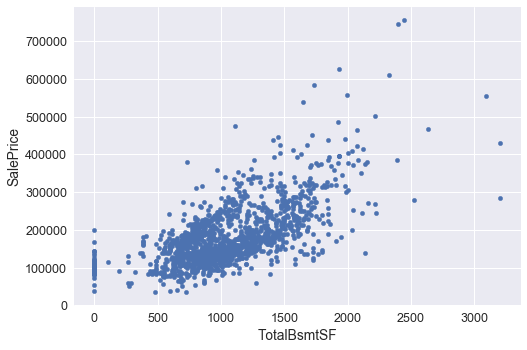

In [38]:
var = 'TotalBsmtSF'
data = pd.concat([df1['SalePrice'], df1[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', )
plt.show()

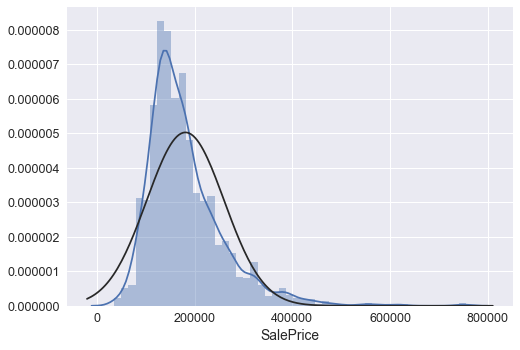

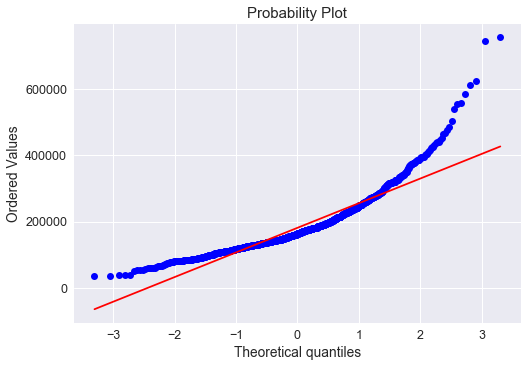

In [40]:
sns.distplot(df0['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(df1['SalePrice'], plot = plt)
plt.show()

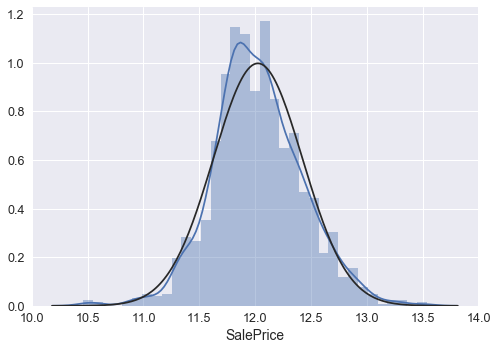

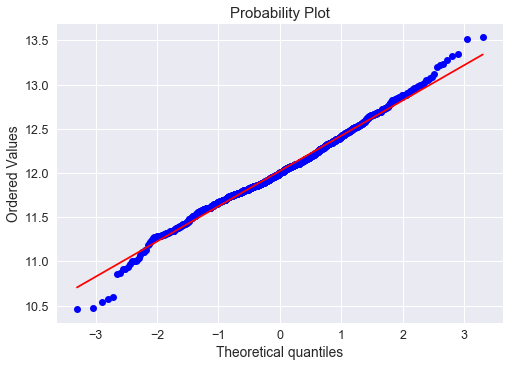

In [41]:
df1['SalePrice'] = np.log(df1['SalePrice'])
sns.distplot(df1['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(df1['SalePrice'], plot = plt)

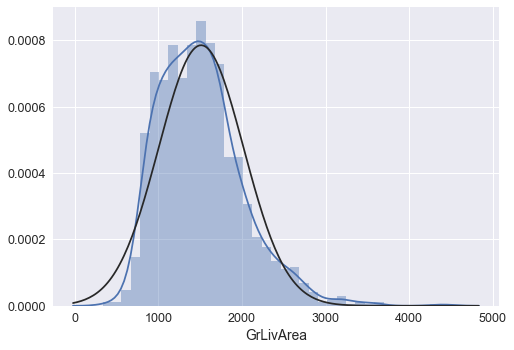

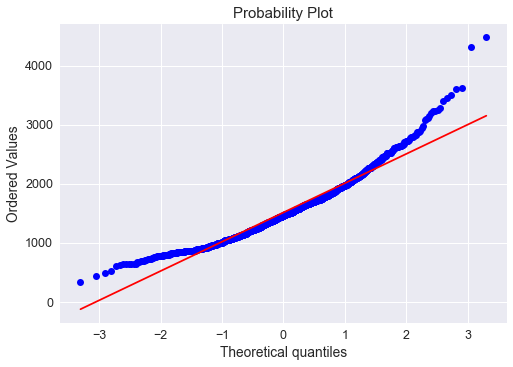

In [42]:
sns.distplot(df1['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df1['GrLivArea'], plot = plt )

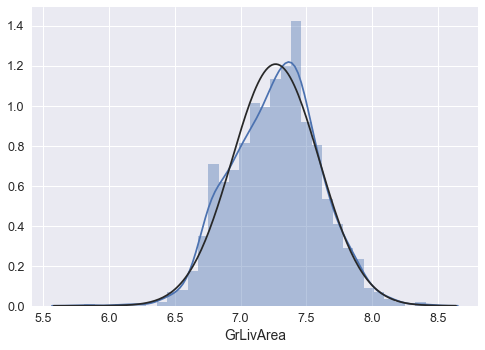

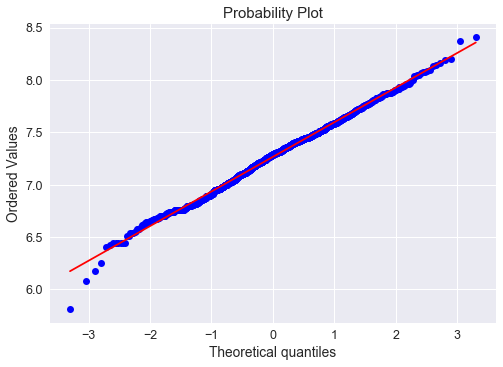

In [43]:
df1['GrLivArea'] = np.log(df1['GrLivArea'])
sns.distplot(df1['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df1['GrLivArea'], plot = plt )

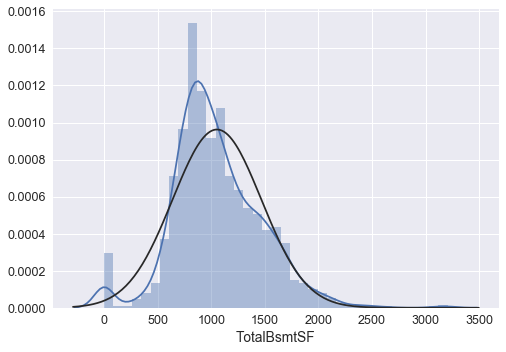

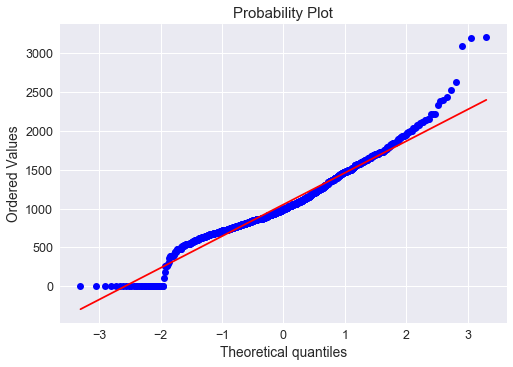

In [44]:
sns.distplot(df1['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df1['TotalBsmtSF'], plot = plt)

In [45]:
# 새로운 컬럼을 만들어서, 0보다 큰지 아닌지를 판별한다. 
# 0보다 큰 값의 인덱스만 뽑아서 TotalBsmtSF 를 전부 로그를 취하면
# 0값 때문에 로그를 못 취하던 부분을 해결할수 있다. 
# 그 값들만 probplot을 그려서 판단한다. 

df1['BsmtSF2'] = pd.Series(len(df1['TotalBsmtSF']), index= df1.index)
df1['BsmtSF2'] = 0
df1.loc[df1['TotalBsmtSF'] > 0 , 'BsmtSF2']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
       ..
1430    0
1431    0
1432    0
1433    0
1434    0
1435    0
1436    0
1437    0
1438    0
1439    0
1440    0
1441    0
1442    0
1443    0
1444    0
1445    0
1446    0
1447    0
1448    0
1449    0
1450    0
1451    0
1452    0
1453    0
1454    0
1455    0
1456    0
1457    0
1458    0
1459    0
Name: BsmtSF2, dtype: int64

In [46]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df1['BsmtSF2'] = pd.Series(len(df1['TotalBsmtSF']), index=df1.index)
df1['BsmtSF2'] = 0 
df1.loc[df1['TotalBsmtSF']>0,'BsmtSF2'] = 1

In [47]:
#transform data
df1.loc[df1['BsmtSF2']==1,'TotalBsmtSF'] = np.log(df1['TotalBsmtSF'])

C:\Users\UY Kim\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [48]:
df1.loc[df1['BsmtSF2']==1, 'TotalBdmtSF'] = np.log(df1['TotalBsmtSF'])

C:\Users\UY Kim\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [49]:
df1['TotalBsmtSF']

0       6.752270
1       7.140453
2       6.824374
3       6.628041
4       7.043160
5       6.679599
6       7.430114
7       7.009409
8       6.858565
9       6.898715
10      6.946976
11      7.069023
12      6.815640
13      7.309212
14      7.133296
15      6.723832
16      6.911747
17      0.000000
18      7.015712
19      6.936343
20      7.054450
21      6.456770
22      7.482682
23      6.946976
24      6.966024
25      7.356280
26      6.802395
27      7.440734
28      7.302496
29      6.253829
          ...   
1430    6.595781
1431    6.864848
1432    6.486161
1433    6.841615
1434    7.026427
1435    7.184629
1436    6.761573
1437    7.566311
1438    6.815640
1439    6.289716
1440    6.376727
1441    6.742881
1442    6.924612
1443    6.858565
1444    7.259820
1445    6.701960
1446    7.080026
1447    7.106606
1448    6.327937
1449    6.445720
1450    6.797940
1451    7.360740
1452    6.304449
1453    7.038784
1454    7.107425
1455    6.859615
1456    7.340836
1457    7.0492

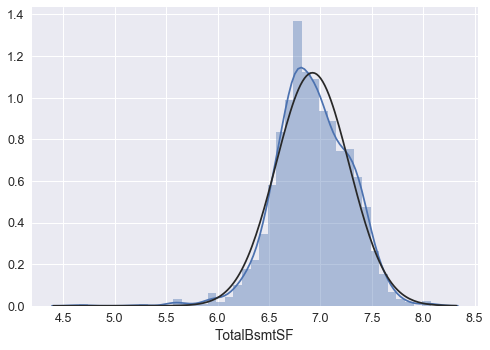

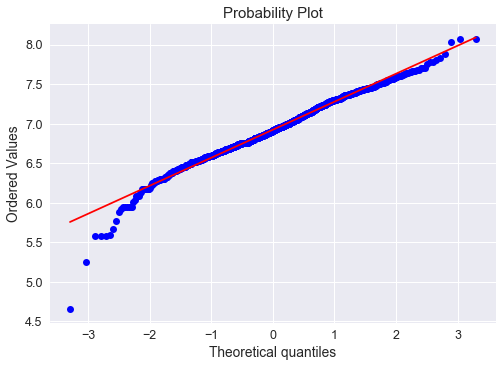

In [50]:
sns.distplot(df1[df1['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1[df1['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)